Super simple time-series model.

\begin{aligned}
x_0 \leftarrow & 0 \\
x_i \sim & \mathrm{Normal}(x_{i-1},0.1), & 1 \leq i \leq N \\
y_i \sim & \mathrm{Normal}(x_i,1), & 0 \leq i \leq N \\
\end{aligned}

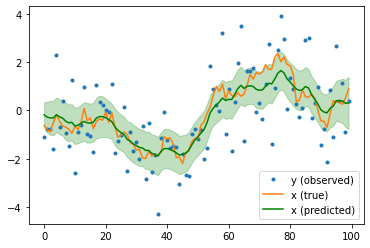

In [6]:
from pangolin import d, t, Given, recurse, vmap, E, sample, std, jags_code
from matplotlib import pyplot as plt
import numpy as np

# generate x by using RECURSE
def f(carry,input):
    return d.norm(carry,10)
x = recurse(f)(0,np.zeros(100))

# generate y by using VMAP
def g(xi):
    return d.norm(xi,1)
y = vmap(g)(x)

# generate synthetic data by sampling from the model
x_tru, y_obs = sample([x,y],niter=1)
x_tru = x_tru[0]
y_obs = y_obs[0]

# predict latents from synth observations
x_pred = E(x,Given(y==y_obs))
x_std  = std(x,Given(y==y_obs))

# compare predictions to true values
plt.plot(y_obs,'.',label='y (observed)')
plt.plot(x_tru,'-',label='x (true)')
plt.plot(x_pred,'-',color='green',label='x (predicted)')
plt.fill_between(np.arange(len(x_pred)), x_pred-2*x_std, x_pred+2*x_std, color='green',alpha=0.25)
plt.legend();

Note this becomes a for loop in jags—it isn't unrolled.

In [2]:
print(jags_code(y))

model{
v10v[1] <- v0v;
for(i0 in 1:100){
  v10v[i0+1]~dnorm(v10v[i0],v4v);
  v12v[i0]<-(v10v[i0+1])+(v7v);
}
for (i0 in 1:100){
  v16v[i0]~dnorm(v12v[i0],v14v);
}
}

